```md
- OLS : unbias
- 


data check
- kiểm tra dữ liệu khuyết 
- có đúng mô tả của UCL ko 


```

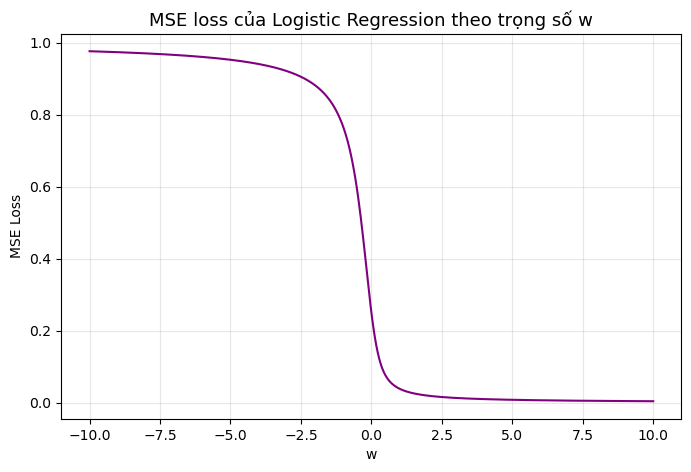

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Hàm sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Hàm mất mát MSE cho logistic regression
def mse_loss(w, x, y):
    z = sigmoid(w * x)
    return np.mean((y - z) ** 2)

# Tạo dữ liệu mẫu: 1 feature và 1 nhãn
x = np.linspace(-5, 5, 100)
y = (x > 0).astype(float)  # y = 1 nếu x > 0, ngược lại y = 0

# Quét các giá trị w để xem hình dạng hàm mất mát
w_values = np.linspace(-10, 10, 400)
loss_values = [mse_loss(w, x, y) for w in w_values]

# Vẽ đồ thị
plt.figure(figsize=(8,5))
plt.plot(w_values, loss_values, color='purple')
plt.title("MSE loss của Logistic Regression theo trọng số w", fontsize=13)
plt.xlabel("w")
plt.ylabel("MSE Loss")
plt.grid(True, alpha=0.3)
plt.show()


In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("data/data.csv", sep=";")
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [3]:
data["Target"].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [4]:
data.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [6]:
def encode_target(value: str) -> int:
    if value == "Enrolled" or value == "Graduate":
        return 1
    return 0

In [7]:
data["Target"] = data["Target"].apply(encode_target)

In [8]:
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


```md
assumption: 
- các lớp độc lập với nhau, x độc lập 
- p(x|Ci) ~ N(Mi, \sum(i))
- \sum(1) = \sum(2) = \sum()

```

```md
- Normalization tren cot float 

```

In [9]:
# Xem cac cot la continuous value 
continuous_columns = []

for column in data.select_dtypes(include=['float']).columns:
    continuous_columns.append(column)
    
continuous_columns

['Previous qualification (grade)',
 'Admission grade',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (grade)',
 'Unemployment rate',
 'Inflation rate',
 'GDP']

In [10]:
# Normalization 
for column in continuous_columns:
    data[column] = (data[column] - data[column].mean()) / data[column].std()
    
data[continuous_columns]    

,Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
0,-0.804750,0.022226,-2.196854,-1.963267,-0.287606,0.124372,0.765674
1,2.076585,1.071805,0.693520,0.659487,0.876123,-1.105097,0.347160
2,-0.804750,-0.150402,-2.196854,-1.963267,-0.287606,0.124372,0.765674
3,-0.804750,-0.509468,0.575546,0.416403,-0.813161,-1.466705,-1.375356
4,-2.472892,1.002754,0.349428,0.531548,0.876123,-1.105097,0.347160
...,...,...,...,...,...,...,...
4419,-0.577276,-0.329935,0.610938,0.467578,1.476757,1.136876,-1.789464
4420,-0.956399,-0.550899,0.280610,0.147730,-0.174987,-0.454201,0.889026
4421,1.621637,1.555164,0.881911,0.627502,0.876123,-1.105097,0.347160
4422,3.593077,1.852084,0.652229,0.339639,-0.813161,-1.466705,-1.375356


Split train, test

In [11]:
X = data.iloc[:, :-1]

In [12]:
y = data.iloc[:, -1]
y.value_counts()

Target
1    3003
0    1421
Name: count, dtype: int64

In [13]:
def split_data(df): 
    X = df.drop(columns="Target").to_numpy(dtype=float)
    y = df["Target"].to_numpy(dtype=float)
    
    np.random.seed(42)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    X_shuffled = X[indices]
    y_shuffled = y[indices]
    
    split_ratio = 0.8
    split_index = int(X_shuffled.shape[0] * split_ratio)

    X_train, X_test = X_shuffled[:split_index], X_shuffled[split_index:]
    y_train, y_test = y_shuffled[:split_index], y_shuffled[split_index:]
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(data)

In [14]:
(y_train == 1).sum() / len(y_train)

np.float64(0.6750494489968918)

In [15]:
(y_test == 1).sum() / len(y_test)

np.float64(0.6937853107344633)

In [ ]:
from tqdm import tqdm

class LogisticRegression: 
    def __init__(self, epoch: int, lr: float) -> None:
        self.epoch = epoch
        self.lr = lr    
        self.losses = []
        self.metrics = []
        
    def sigmoid(self, z: np.ndarray) -> np.ndarray:
        return 1 / (1 + np.exp(-z))
        
    def loss_fn(self, y: np.ndarray, y_hat: np.ndarray) -> float: 
        return -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)).mean()
    
    def accuracy(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        return (1 - np.abs(y - y_hat)).mean()
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None: 
        n = X.shape[0]
        d = X.shape[1]
        self.theta = np.zeros((d, 1))
        with tqdm(range(self.epoch)) as pb: 
            for e in pb: 
                # forward 
                pb.set_description(f"Epoch {e + 1}")
                y_hat = self.predict(X)
                
                # backward
                diff = y_hat - y
                gradient = 1/n * np.matmul(X.T, diff) 
                self.theta -= self.lr * gradient
                
                # evaluating 
                y_hat = self.predict(X)
                loss = self.loss_fn(y, y_hat)
                acc = self.accuracy(y, y_hat)
                pb.set_postfix({
                    "loss": loss,
                    "acc": acc
                })
                
                self.losses.append(loss)
                self.metrics.append(acc)
                
    def predict(self, X: np.ndarray) -> np.ndarray:
        z = np.matmul(X, self.theta)
        y_hat = self.sigmoid(z)
        
        return y_hat


In [37]:
logistic_reg = LogisticRegression(500, 0.5)

In [38]:
logistic_reg.fit(X, y)

Epoch 1:   0%|          | 0/500 [00:00<?, ?it/s]


ValueError: Unable to coerce to Series, length must be 1: given 3

In [ ]:
# loss_fn -> y_hat + 1e-9

SyntaxError: invalid syntax (3157043089.py, line 1)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

import numpy as np
from tqdm import tqdm

class LogisticRegression:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.losses = []
        self.accuracies = []

    def sigmoid(self, z):
        z = np.clip(z, -100, 100)
        return 1 / (1 + np.exp(-z))
    
    def loss_fn(self, y, y_hat):
        eps = 1e-8
        y_hat = np.clip(y_hat, eps, 1 - eps)
        return -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)).mean()
    
    def accuracy(self, y, y_hat):
        preds = (y_hat >= 0.5).astype(int)
        return (preds == y).mean()
    
    def fit(self, X, y):
        # Chuẩn hóa shape
        X = np.asarray(X)
        y = np.asarray(y).reshape(-1, 1)
        n_samples, n_features = X.shape
        
        # Khởi tạo tham số
        self.theta = np.zeros((n_features, 1))
        
        for epoch in tqdm(range(self.epochs), desc="Training"):
            # Forward
            y_hat = self.sigmoid(X @ self.theta)
            
            # Gradient descent
            gradient = (X.T @ (y_hat - y)) / n_samples
            self.theta -= self.lr * gradient

            # Tính loss + acc
            loss = self.loss_fn(y, y_hat)
            acc = self.accuracy(y, y_hat)
            self.losses.append(loss)
            self.accuracies.append(acc)
            
            if epoch % 100 == 0 or epoch == self.epochs - 1:
                tqdm.write(f"Epoch {epoch+1}/{self.epochs} | Loss={loss:.4f}, Acc={acc:.4f}")
    
    def predict_proba(self, X):
        return self.sigmoid(X @ self.theta)
    
    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)


In [ ]:
# Khởi tạo model
model = LogisticRegression(lr=0.0005, epochs=1000)

# Train model
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

# Đánh giá
acc_test = (y_pred.reshape(-1) == y_test.reshape(-1)).mean()
print(f"Test Accuracy: {acc_test:.4f}")
